## Generate spacing and slice information records file for each of the CT scans

In [37]:
# Use full browser width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import display

%matplotlib inline 

# paths = ['/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH2/1777243_13410770_02_140806_2233_002_ThinSliceSeq_4_0_H40s_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH4/3708063_10968221_01_310816_2010_002_Head_5_0_MPR_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH7/m_3742364_11045234_01_211016_0208_002_Head_5_0_J40s_3_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH8/3758895_11066947_01_041116_0009_007_Head_5_0_J40s_3_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH9/3764350_##_01_131116_0152_002_Head_5_0_J40s_3_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH11/3797770_23590_01_221216_0345_002_Head_5_0_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH12/3798130_43976_01_040117_2338_002_Brain_2_5_5mm_SS40_image.nii.gz',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH14/6vqQ294_CT1.nii.gz',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH16-2/ct_20215_2_image.nii.gz',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH24/ct_12715_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/CONT4/1805902_13598258_01_100407_1814_002_ThinSliceSeq_4_0_H40s_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/CONT5/g_3487946_10590242_01_161215_0440_002_Head_5_0_J40s_3_image.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/CONT7/3797961_76845_02_010117_2344_002_Head_5_0_image.nii.gz',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/EDH7/3799763_93620_01_231216_1823_80256_MPR_image.nii.gz',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/Sample3_Pre/S3_Pre-op.nrrd',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/Sample3_Post/S3_Post-op.nrrd',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/Sample4_Pre/S4_Pre-op.nrrd',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/tutorial3/ct-brain.nii.gz',
#         '/Volumes/FAIR/Eric_Midlinedeliniation/MPS1/1bLs736 - 80340.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS2/1kAg181-2.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS3/1kvR906 - 3.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS4/1YaA080 - 3.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS5/2bai335 - 6.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS6/2bjs359 - 4.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS7/2dgm988 - 601.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS8/2FfC223 - 2.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS9/2uTT322 - 2.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS10/2VAp647 - 200.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS11/2viJ294 - 2.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS12/2wbs775 - 5.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS13/3BSL889 - 250.nii.gz',
#          '/Volumes/FAIR/Eric_Midlinedeliniation/MPS14/3DJe857 - 252.nii.gz']

paths = ['/Volumes/FAIR/Registered_MPS3/MPS1',
         '/Volumes/FAIR/Registered_MPS3/MPS2',
         '/Volumes/FAIR/Registered_MPS3/MPS3',
         '/Volumes/FAIR/Registered_MPS3/MPS4',
         '/Volumes/FAIR/Registered_MPS3/MPS5',
         '/Volumes/FAIR/Registered_MPS3/MPS6',
         '/Volumes/FAIR/Registered_MPS3/MPS7',
         '/Volumes/FAIR/Registered_MPS3/MPS8',
         '/Volumes/FAIR/Registered_MPS3/MPS9',
         '/Volumes/FAIR/Registered_MPS3/MPS10',
         '/Volumes/FAIR/Registered_MPS3/MPS11',
         '/Volumes/FAIR/Registered_MPS3/MPS12',
         '/Volumes/FAIR/Registered_MPS3/MPS13',
         '/Volumes/FAIR/Registered_MPS3/MPS14',
         '/Volumes/FAIR/Registered_MPS3/SDH4',
         '/Volumes/FAIR/Registered_MPS3/SDH7',
         '/Volumes/FAIR/Registered_MPS3/SDH8',
         '/Volumes/FAIR/Registered_MPS3/SDH11',
         '/Volumes/FAIR/Registered_MPS3/SDH12',
         '/Volumes/FAIR/Registered_MPS3/SDH14',
         '/Volumes/FAIR/Registered_MPS3/SDH24',
         '/Volumes/FAIR/Registered_MPS3/CONT5',
         '/Volumes/FAIR/Registered_MPS3/CONT7',
         '/Volumes/FAIR/Registered_MPS3/EDH7',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Pre',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Post',
         '/Volumes/FAIR/Registered_MPS3/Sample4_Pre',
         '/Volumes/FAIR/Registered_MPS3/tutorial3']


file_list, size_list, spacing_list,slice_number,thickness,origins,directs = [],[],[],[],[],[],[]
for i in range(len(paths)):
# for i in range(0,1):
    path = paths[i]
    print( "Reading directory:", path)
    file = os.path.split(path)[1]
    img = sitk.Cast(sitk.ReadImage(path+'/CT.nii.gz'), sitk.sitkFloat32)
    size = img.GetSize()
    spacing = img.GetSpacing()
    origin = img.GetOrigin()
    direct = img.GetDirection()
    slice_number.append(size[2])
    thickness.append(spacing[2])
    origins.append(origin)
    file_list.append(file)
    size_list.append(size)
    directs.append(direct)
    spacing_list.append(spacing)

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS1
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS2
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS3
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS4
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS5
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS6
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS7
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS8
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS9
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS10
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS11
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS12
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS13
Reading directory: /Volumes/FAIR/Registered_MPS3/MPS14
Reading directory: /Volumes/FAIR/Registered_MPS3/SDH4
Reading directory: /Volumes/FAIR/Registered_MPS3/SDH7
Reading directory: /Volumes/FAIR/Registered_MPS3/SDH8
Reading directory: /Volumes/FAIR/Registered_MPS3/SDH11
Reading directory: /Vo

In [34]:
os.path.split(path)[1]

'tutorial3'

In [35]:
output = {'ID':file_list,
         'Size':size_list,
         'Spacing':spacing_list,
         'sclice_number':slice_number,
         'slice_thickness':thickness,
         'origin':origins,
         'directions':directs}
import pandas as pd
spacing_record = pd.DataFrame(data = output)
# spacing_record.to_csv('MPSs_spacing_record_1.csv')

In [36]:
spacing_record

,ID,Size,Spacing,sclice_number,slice_thickness,origin,directions
0,MPS1,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
1,MPS2,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
2,MPS3,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
3,MPS4,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
4,MPS5,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
5,MPS6,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
6,MPS7,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
7,MPS8,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
8,MPS9,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"
9,MPS10,"(400, 400, 60)","(0.5738769769668579, 0.5738769769668579, 2.832...",60,2.832981,"(0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)"


In [82]:
img.GetDirection(),img.GetOrigin()

((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (0.2880859375, 0.2880859375, 0.19999855756759644))

# Resampling exercise

In [1]:
def resample(img, new_size=None, new_spacing=None):
    old_size = img.GetSize()
    old_spacing = img.GetSpacing()
    
    if new_size is None and new_spacing is None:
        return img
    
    if new_size is None:
        # Compute new image dimensions based on the desired rescaling of the voxel spacing
        new_size = [int(np.ceil(old_size[d] * old_spacing[d] / new_spacing[d])) for d in range(3)]

    if new_spacing is None:
        # Compute new voxel spacing based on the desired rescaling of the image dimensions
        new_spacing = [old_spacing[d] * old_size[d] / new_size[d] for d in range(3)]

    # Smooth the input image with anisotropic Gaussian filter
    img_smoothed = img
    for d in range(3):
        # Note how the blurring strength can be different in each direction,
        # if the scaling factors are different.
        factor = new_spacing[d] / old_spacing[d]
        sigma = 0.2 * factor
        img_smoothed = sitk.RecursiveGaussian(img_smoothed, sigma=sigma, direction=d)

    # Finally, apply the resampling operation
    img_resampled = sitk.ResampleImageFilter().Execute(
        img_smoothed,        # Input image
        new_size,            # Output image dimensions
        sitk.Transform(),    # Coordinate transformation. sitk.Transform() is a dummy identity transform,
                             # as we want the brain to be in exactly the same place. When we do image registration,
                             # for example, this can be a linear or nonlinear transformation.
        sitk.sitkLinear,     # Interpolation method (cf. also sitk.sitkNearestNeighbor and many others)
        img.GetOrigin(),     # Output image origin (same)
#         (0.0, 0.0, 0.0),
        new_spacing,         # Output voxel spacing
        img.GetDirection(),  # Output image orientation (same)
#         (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
        0,                   # Fill value for points outside the input domain
        img.GetPixelID())    # Voxel data type (same)

    return img_resampled

def resample_mask(img, new_size=None, new_spacing=None):
    old_size = img.GetSize()
    old_spacing = img.GetSpacing()
    
    if new_size is None and new_spacing is None:
        return img
    
    if new_size is None:
        # Compute new image dimensions based on the desired rescaling of the voxel spacing
        new_size = [int(np.ceil(old_size[d] * old_spacing[d] / new_spacing[d])) for d in range(3)]

    if new_spacing is None:
        # Compute new voxel spacing based on the desired rescaling of the image dimensions
        new_spacing = [old_spacing[d] * old_size[d] / new_size[d] for d in range(3)]


    # Finally, apply the resampling operation
    img_resampled = sitk.ResampleImageFilter().Execute(
        img,        # Input image
        new_size,            # Output image dimensions
        sitk.Transform(),    # Coordinate transformation. sitk.Transform() is a dummy identity transform,
                             # as we want the brain to be in exactly the same place. When we do image registration,
                             # for example, this can be a linear or nonlinear transformation.
        sitk.sitkNearestNeighbor,     # Interpolation method (cf. also sitk.sitkNearestNeighbor and many others)
        img.GetOrigin(),     # Output image origin (same)
#         (0.0, 0.0, 0.0),
        new_spacing,         # Output voxel spacing
        img.GetDirection(),  # Output image orientation (same)
        0,                   # Fill value for points outside the input domain
        img.GetPixelID())    # Voxel data type (same)

    return img_resampled

%matplotlib inline

# Calculate parameters low and high from window and level
def wl_to_lh(window, level):
    low = level - window/2
    high = level + window/2
    return low,high

def display_image(img, x=None, y=None, z=None, window=None, level=None):
    # Convert SimpleITK image to NumPy array
    img_array = sitk.GetArrayFromImage(img)
    
    # Get image dimensions in millimetres
    size = img.GetSize()
    spacing = img.GetSpacing()
    width  = size[0] * spacing[0]
    height = size[1] * spacing[1]
    depth  = size[2] * spacing[2]
    
    if x is None:
        x = np.floor(size[0]/2).astype(int)
    if y is None:
        y = np.floor(size[1]/2).astype(int)
    if z is None:
        z = np.floor(size[2]/2).astype(int)
    
    if window is None:
        window = np.max(img_array) - np.min(img_array)
    
    if level is None:
        level = window / 2 + np.min(img_array)
    
    low,high = wl_to_lh(window,level)

    # Display the orthogonal slices
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.imshow(img_array[z,:,:], cmap='gray', clim=(low, high), extent=(0, width, height, 0))
    ax2.imshow(img_array[:,y,:], origin='lower', cmap='gray', clim=(low, high), extent=(0, width,  0, depth))
    ax3.imshow(img_array[:,:,x], origin='lower', cmap='gray', clim=(low, high), extent=(0, height, 0, depth))

    # Additionally display crosshairs
    ax1.axhline(y * spacing[1], lw=1)
    ax1.axvline(x * spacing[0], lw=1)
    
    ax2.axhline(z * spacing[2], lw=1)
    ax2.axvline(x * spacing[0], lw=1)
    
    ax3.axhline(z * spacing[2], lw=1)
    ax3.axvline(y * spacing[1], lw=1)

    plt.show()
    
def interactive_view(img):
    size = img.GetSize() 
    img_array = sitk.GetArrayFromImage(img)
    interact(display_image,img=fixed(img),
             x=(0, size[0] - 1),
             y=(0, size[1] - 1),
             z=(0, size[2] - 1),
             window=(0,np.max(img_array) - np.min(img_array)),
             level=(np.min(img_array),np.max(img_array)));

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanD/CT_Resampled.nii.gz
Spacing: (0.5899999737739563, 0.6407031416893005, 2.932680130004883) Origin:(0.0, 0.0, 0.0) direction:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


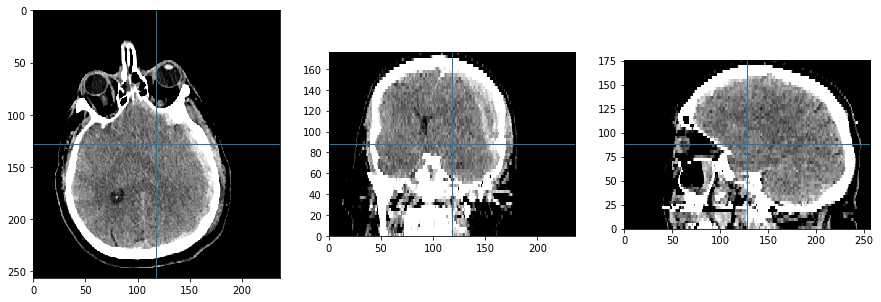

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanE/CT_Resampled.nii.gz
Spacing: (0.5849999785423279, 0.5849999785423279, 2.8350493907928467) Origin:(0.0, 0.0, 0.0) direction:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


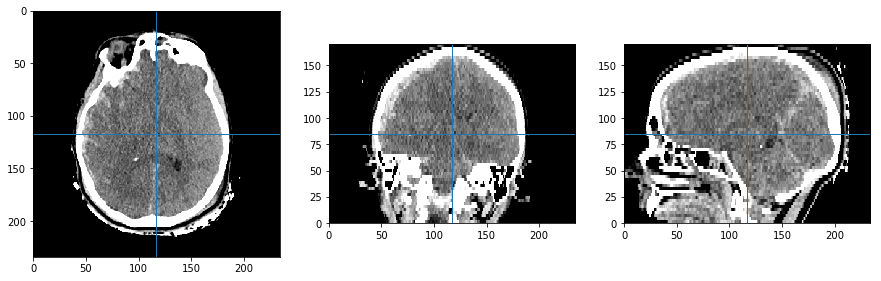

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanF/CT_Resampled.nii.gz
Spacing: (0.6200000047683716, 0.6200000047683716, 3.243389844894409) Origin:(0.0, 0.0, 0.0) direction:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


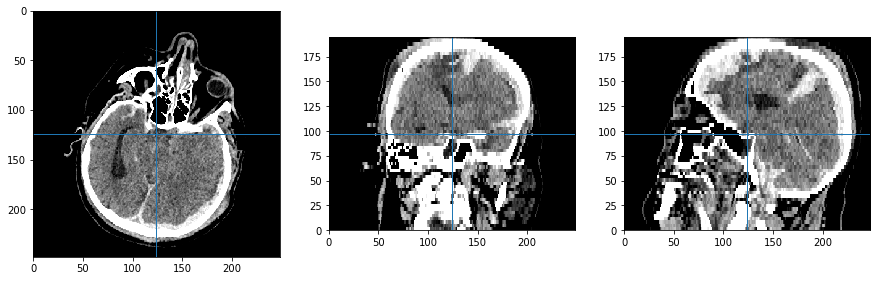

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanH/CT_Resampled.nii.gz
Spacing: (0.5750002861022949, 0.6569827795028687, 2.466017484664917) Origin:(0.0, 0.0, 0.0) direction:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


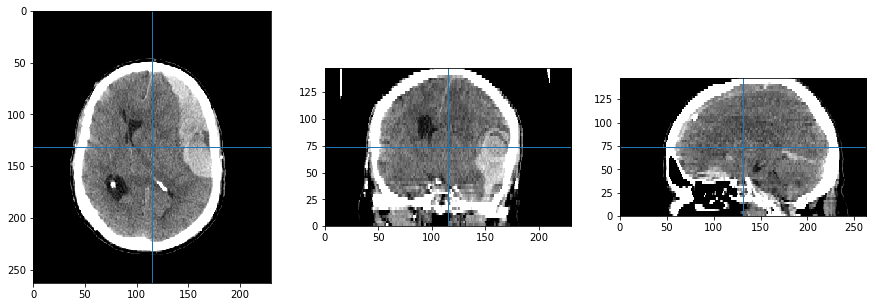

In [46]:
# Use full browser width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import display

%matplotlib inline 

paths = ['/Volumes/FAIR/Registered_MPS3/ScanD/CT_Resampled.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanE/CT_Resampled.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanF/CT_Resampled.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/ScanH/CT_Resampled.nii.gz',
         ]

for i in range(len(paths)):
# for i in range(0,1):
    path = paths[i]
    print( "Reading directory:", path)
    file = os.path.split(os.path.split(path)[0])[1]
    img = sitk.Cast(sitk.ReadImage(path), sitk.sitkFloat32)
#     mps = sitk.ReadImage(path)
    size = img.GetSize()
    spacing = img.GetSpacing()
    dir_name = os.path.split(path)[0]
#     mps = sitk.ReadImage(dir_name + '/MPS.nii.gz')

    img_resampled = resample_mask(img, new_size=[400, 400, 60])
#     mps_resampled = resample_mask(mps, new_size=[100, 100, 100])

    print("Spacing: {}".format(img.GetSpacing()),'Origin:{}'.format(img.GetOrigin()),'direction:{}'.format(img.GetDirection()))
    display_image(img, window=90, level=40)
#     display_image(mps)
    
    
#     print("Spacing: {}".format(img_resampled.GetSpacing()))
#     display_image(img_resampled, window=90, level=40)
#     display_image(mps_resampled)

#     sitk.WriteImage(img_resampled,dir_name + '/' + file+'_Resampled.nii.gz')
#     sitk.WriteImage(mps_resampled,dir_name + '/' + 'mps_Resampled.nii.gz')




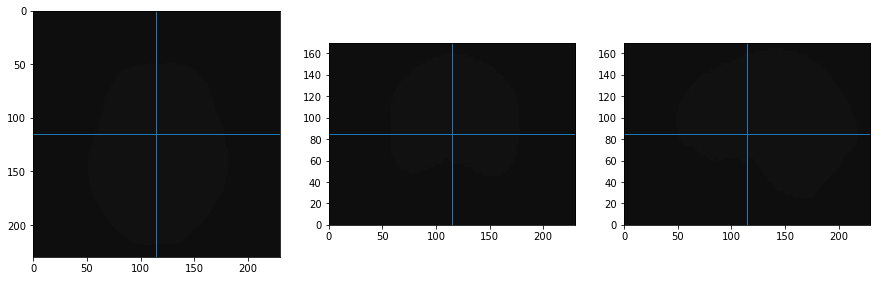

In [17]:
display_image(img_resampled,window=90, level=40)
sitk.WriteImage(img_resampled,dir_name + '/' 'CT_R.nii.gz')
# sitk.WriteImage(mps_resampled,dir_name + '/' 'MPS_R.nii.gz')



In [195]:
img_resampled.GetOrigin()

(0.0, 0.0, 0.0)

Reading directory: /Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH4/3708063_10968221_01_310816_2010_002_Head_5_0_MPR_image.nii.gz
Spacing: (0.390625, 0.390625, 4.9539642333984375)


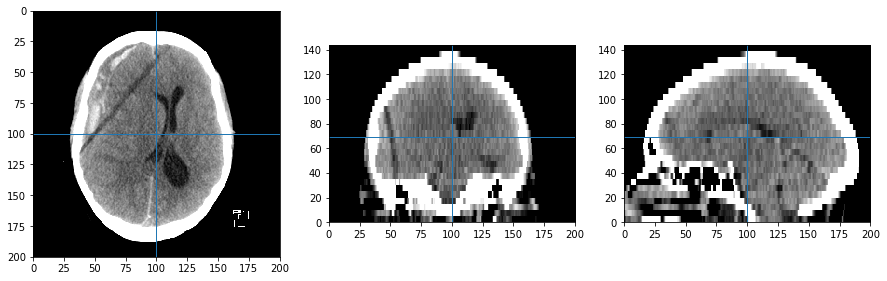

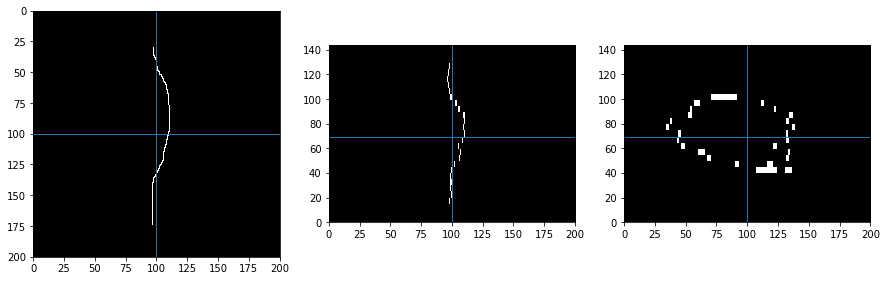

Spacing: (0.5, 0.5, 2.3944160461425783)


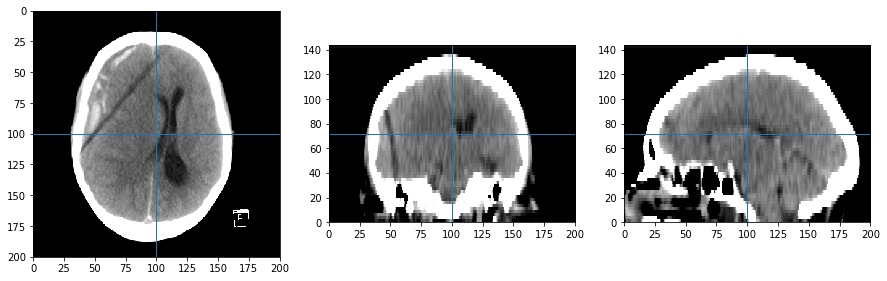

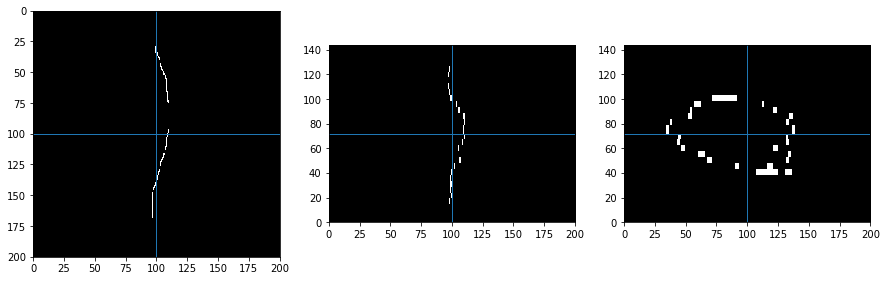

In [187]:
# Use full browser width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import display

%matplotlib inline 

paths = [''
       '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH2/1777243_13410770_02_140806_2233_002_ThinSliceSeq_4_0_H40s_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH4/3708063_10968221_01_310816_2010_002_Head_5_0_MPR_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH7/m_3742364_11045234_01_211016_0208_002_Head_5_0_J40s_3_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH8/3758895_11066947_01_041116_0009_007_Head_5_0_J40s_3_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH9/3764350_##_01_131116_0152_002_Head_5_0_J40s_3_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH11/3797770_23590_01_221216_0345_002_Head_5_0_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH12/3798130_43976_01_040117_2338_002_Brain_2_5_5mm_SS40_image.nii.gz',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH14/6vqQ294_CT1.nii.gz',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH16-2/ct_20215_2_image.nii.gz',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH24/ct_12715_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/CONT4/1805902_13598258_01_100407_1814_002_ThinSliceSeq_4_0_H40s_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/CONT5/g_3487946_10590242_01_161215_0440_002_Head_5_0_J40s_3_image.nii.gz',
         '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/CONT7/3797961_76845_02_010117_2344_002_Head_5_0_image.nii.gz',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/EDH7/3799763_93620_01_231216_1823_80256_MPR_image.nii.gz',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/Sample3_Pre/S3_Pre-op.nrrd',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/Sample3_Post/S3_Post-op.nrrd',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/Sample4_Pre/S4_Pre-op.nrrd',
        '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/tutorial3/ct-brain.nii.gz']

# for i in range(len(paths)):
for i in range(1,2):
    path = paths[i]
    print( "Reading directory:", path)
    file = os.path.split(os.path.split(path)[0])[1]
    img = sitk.Cast(sitk.ReadImage(path), sitk.sitkFloat32)
    mps = sitk.ReadImage(path)
    size = img.GetSize()
    spacing = img.GetSpacing()
    dir_name = os.path.split(path)[0]
    mps = sitk.ReadImage(dir_name + '/mps.nii.gz')
    seg = sitk.ReadImage(dir_name + '/segmentation.nii.gz')

    img_resampled = resample(img, new_size=[400, 400, 60])
    mps_resampled = resample_mask(mps, new_size=[400, 400, 60])
    seg_resampled = resample_mask(seg, new_size=[400, 400, 60])


    print("Spacing: {}".format(img.GetSpacing()))
    display_image(img, window=90, level=40)
    display_image(mps)

    print("Spacing: {}".format(img_resampled.GetSpacing()))
    display_image(img_resampled, window=90, level=40)
    display_image(mps_resampled)

#     sitk.WriteImage(img_resampled,dir_name + '/' + file+'_Resampled.nii.gz')
#     sitk.WriteImage(mps_resampled,dir_name + '/' + 'mps_Resampled.nii.gz')
#     sitk.WriteImage(seg_resampled,dir_name + '/' + 'seg_Resampled.nii.gz')





In [188]:
# img_resampled.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))
img_resampled.SetOrigin((0,0,0))
img_resampled.GetDirection()
sitk.WriteImage(img_resampled,dir_name + '/' + file+'_Resampled.nii.gz')

In [175]:
img_resampled.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [206]:
sitk.AffineTransform(3)

<SimpleITK.SimpleITK.AffineTransform; proxy of <Swig Object of type 'itk::simple::AffineTransform *' at 0x11ee937b0> >